Test accuracy: 0.9682
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.93      1.00      0.96        13
           2       0.95      1.00      0.97        18
           3       1.00      1.00      1.00        10
           4       1.00      0.96      0.98        25
           5       0.94      0.94      0.94        16
           6       0.93      0.88      0.90        16
           7       1.00      1.00      1.00        11
           8       0.92      1.00      0.96        11
           9       0.94      1.00      0.97        15
           a       1.00      1.00      1.00        14
           b       1.00      0.90      0.95        10
           c       1.00      1.00      1.00        14
           d       0.93      1.00      0.97        14
           e       1.00      1.00      1.00        14
           f       1.00      1.00      1.00        22
           g       1.00      1.00   

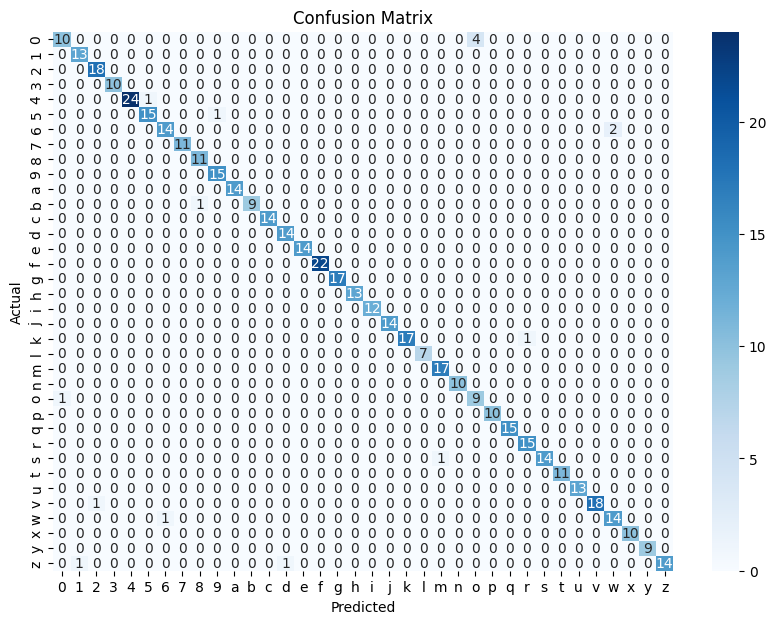

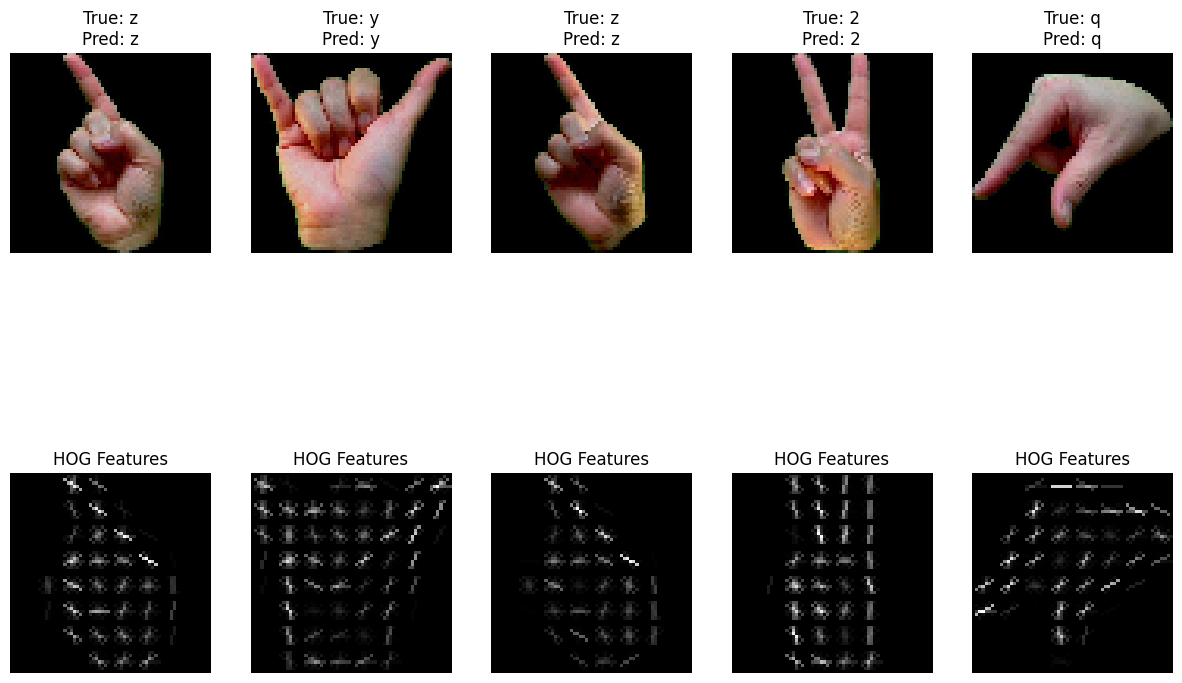

New images shape: (26, 64, 64, 3)
New HOG features shape: (26, 1764)
New dataset accuracy: 0.1154


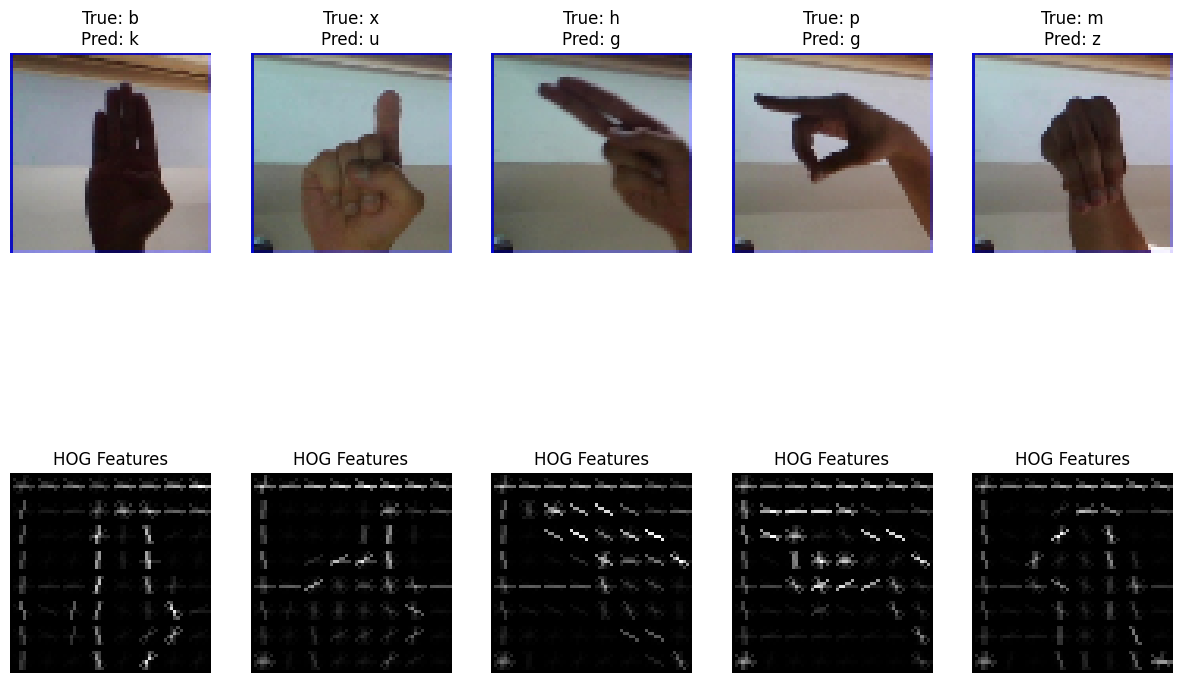

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Function to load data
def load_data(folder, label, img_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
    return images, labels

# Assuming `data_dir` is the path to your dataset directory
data_dir = '/kaggle/input/dataset70-each/asl_dataset'
all_images = []
all_labels = []

for label in os.listdir(data_dir):
    label_folder = os.path.join(data_dir, label)
    if os.path.isdir(label_folder):
        images, labels = load_data(label_folder, label)
        all_images.extend(images)
        all_labels.extend(labels)

all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Function to extract HOG features and visualize them
def extract_hog_features(images):
    hog_features = []
    hog_images = []
    for image in images:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        feature, hog_image = hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        hog_features.append(feature)
        hog_images.append(hog_image)
    return np.array(hog_features), hog_images

# Extract HOG features
hog_features, hog_images = extract_hog_features(all_images)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(all_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hog_features, encoded_labels, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize some HOG features and predictions
def visualize_predictions(images, hog_images, true_labels, pred_labels, label_encoder, num_samples=5):
    plt.figure(figsize=(15, 10))
    indices = np.random.choice(len(images), num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
        plt.title(f'True: {label_encoder.inverse_transform([true_labels[idx]])[0]}\nPred: {label_encoder.inverse_transform([pred_labels[idx]])[0]}')
        plt.axis('off')
        
        plt.subplot(2, num_samples, i + 1 + num_samples)
        plt.imshow(hog_images[idx], cmap='gray')
        plt.title('HOG Features')
        plt.axis('off')
    plt.show()

visualize_predictions(all_images, hog_images, encoded_labels, svm_model.predict(hog_features), label_encoder)

# Now, let's test the model on a new dataset
new_data_dir = '/kaggle/input/data-test-3/asl_alphabet_test/asl_alphabet_test'  # Path to the new dataset

new_images = []
new_labels = []

for label in os.listdir(new_data_dir):
    label_folder = os.path.join(new_data_dir, label)
    if os.path.isdir(label_folder):
        images, labels = load_data(label_folder, label)
        new_images.extend(images)
        new_labels.extend(labels)

new_images = np.array(new_images)
new_labels = np.array(new_labels)

print("New images shape:", new_images.shape)

new_hog_features, new_hog_images = extract_hog_features(new_images)
print("New HOG features shape:", new_hog_features.shape)

if len(new_hog_features) == 0:
    print("No HOG features extracted from the new dataset. Check data loading and feature extraction.")
else:
    # Encode the labels of the new dataset
    encoded_new_labels = label_encoder.transform(new_labels)

    # Predict on the new dataset
    new_y_pred = svm_model.predict(new_hog_features)

    # Evaluate the model on the new dataset
    new_accuracy = accuracy_score(encoded_new_labels, new_y_pred)
    print(f'New dataset accuracy: {new_accuracy:.4f}')

    # Display predictions for the new dataset
    visualize_predictions(new_images, new_hog_images, encoded_new_labels, new_y_pred, label_encoder)


# ALL IN ONE

Preprocessing

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Function to load data
def load_data(folder, label, img_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
    return images, labels

# Assuming `data_dir` is the path to your dataset directory
data_dir = '/kaggle/input/dataset70-each/asl_dataset'
all_images = []
all_labels = []

for label in os.listdir(data_dir):
    label_folder = os.path.join(data_dir, label)
    if os.path.isdir(label_folder):
        images, labels = load_data(label_folder, label)
        all_images.extend(images)
        all_labels.extend(labels)

all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Function to extract HOG features and visualize them
def extract_hog_features(images):
    hog_features = []
    hog_images = []
    for image in images:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        feature, hog_image = hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        hog_features.append(feature)
        hog_images.append(hog_image)
    return np.array(hog_features), hog_images

SVM Test accuracy: 0.9682
KNN Test accuracy: 0.9165
RF Test accuracy: 0.9344


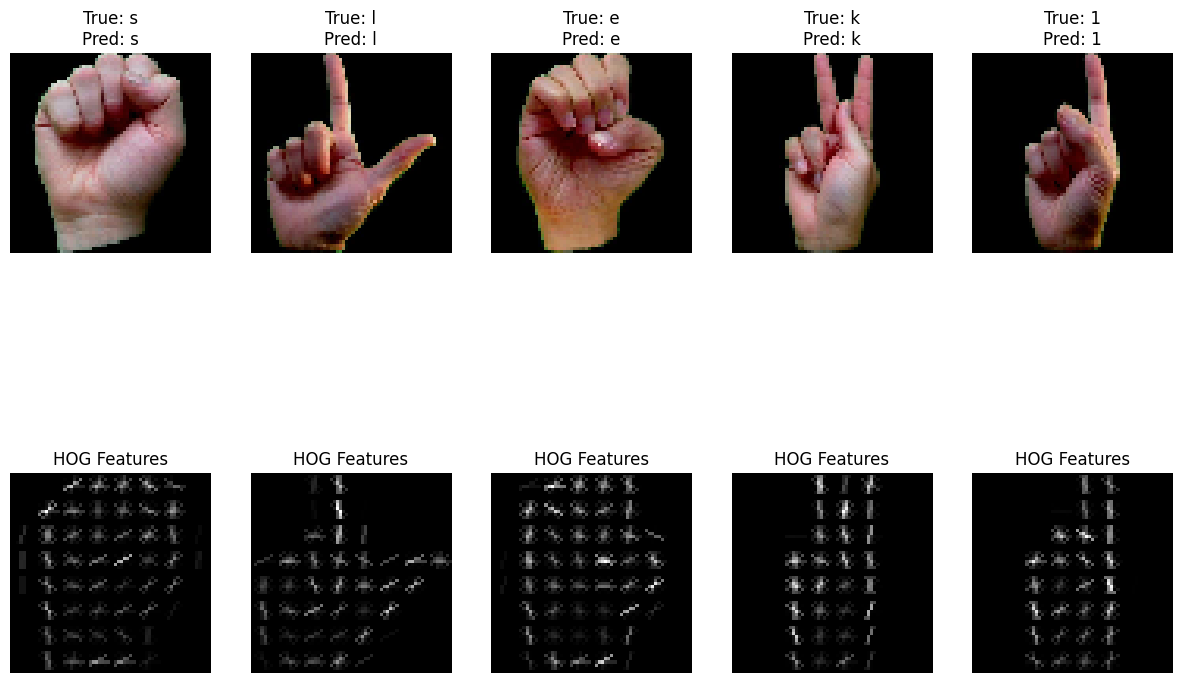

In [3]:
# Extract HOG features
hog_features, hog_images = extract_hog_features(all_images)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(all_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hog_features, encoded_labels, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate SVM model
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f'SVM Test accuracy: {svm_accuracy:.4f}')

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Evaluate KNN model
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f'KNN Test accuracy: {knn_accuracy:.4f}')

# Train RF model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate RF model
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f'RF Test accuracy: {rf_accuracy:.4f}')

def visualize_predictions(images, hog_images, true_labels, pred_labels, label_encoder, num_samples=5):
    plt.figure(figsize=(15, 10))
    indices = np.random.choice(len(images), num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
        plt.title(f'True: {label_encoder.inverse_transform([true_labels[idx]])[0]}\nPred: {label_encoder.inverse_transform([pred_labels[idx]])[0]}')
        plt.axis('off')
        
        plt.subplot(2, num_samples, i + 1 + num_samples)
        plt.imshow(hog_images[idx], cmap='gray')
        plt.title('HOG Features')
        plt.axis('off')
    plt.show()

visualize_predictions(all_images, hog_images, encoded_labels, svm_model.predict(hog_features), label_encoder)





Classification Report 

In [4]:
print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred, target_names=label_encoder.classes_))

print("KNN Classification Report:")
print(classification_report(y_test, knn_y_pred, target_names=label_encoder.classes_))

print("RF Classification Report:")
print(classification_report(y_test, rf_y_pred, target_names=label_encoder.classes_))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.93      1.00      0.96        13
           2       0.95      1.00      0.97        18
           3       1.00      1.00      1.00        10
           4       1.00      0.96      0.98        25
           5       0.94      0.94      0.94        16
           6       0.93      0.88      0.90        16
           7       1.00      1.00      1.00        11
           8       0.92      1.00      0.96        11
           9       0.94      1.00      0.97        15
           a       1.00      1.00      1.00        14
           b       1.00      0.90      0.95        10
           c       1.00      1.00      1.00        14
           d       0.93      1.00      0.97        14
           e       1.00      1.00      1.00        14
           f       1.00      1.00      1.00        22
           g       1.00      1.00      1.00        17


# **Cross_Val**

In [5]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for SVM
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print(f'SVM Cross-Validation Accuracy: {svm_cv_scores.mean():.4f} ± {svm_cv_scores.std():.4f}')

# Perform cross-validation for KNN
knn_cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5)
print(f'KNN Cross-Validation Accuracy: {knn_cv_scores.mean():.4f} ± {knn_cv_scores.std():.4f}')

# Perform cross-validation for RF
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f'RF Cross-Validation Accuracy: {rf_cv_scores.mean():.4f} ± {rf_cv_scores.std():.4f}')


SVM Cross-Validation Accuracy: 0.9632 ± 0.0125
KNN Cross-Validation Accuracy: 0.9125 ± 0.0151
RF Cross-Validation Accuracy: 0.9458 ± 0.0107


Unseen Dataset

Test accuracy: 0.9165
New images shape: (26, 64, 64, 3)
New HOG features shape: (26, 1764)
New dataset accuracy: 0.1538
New rf_dataset accuracy: 0.1538


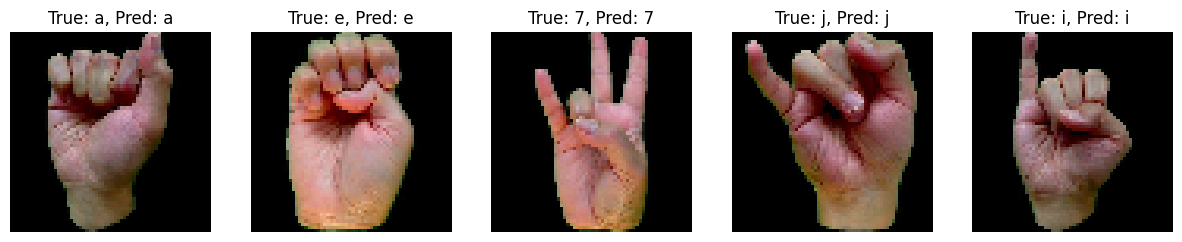

In [18]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Function to load data
def load_data(folder, label, img_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
    return images, labels

# Assuming `data_dir` is the path to your dataset directory
data_dir = '/kaggle/input/dataset70-each/asl_dataset'
all_images = []
all_labels = []

for label in os.listdir(data_dir):
    label_folder = os.path.join(data_dir, label)
    if os.path.isdir(label_folder):
        images, labels = load_data(label_folder, label)
        all_images.extend(images)
        all_labels.extend(labels)

all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Function to extract HOG features
def extract_hog_features(images):
    hog_features = []
    for image in images:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        feature = hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
        hog_features.append(feature)
    return np.array(hog_features)

# Extract HOG features
hog_features = extract_hog_features(all_images)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(all_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hog_features, encoded_labels, test_size=0.2, random_state=42)

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Evaluate the model
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')

# Now, let's test the model on a new dataset
new_data_dir = '/kaggle/input/data-test-3/asl_alphabet_test/asl_alphabet_test'  # Path to the new dataset

new_images = []
new_labels = []

for label in os.listdir(new_data_dir):
    label_folder = os.path.join(new_data_dir, label)
    if os.path.isdir(label_folder):
        images, labels = load_data(label_folder, label)
        new_images.extend(images)
        new_labels.extend(labels)

new_images = np.array(new_images)
new_labels = np.array(new_labels)

print("New images shape:", new_images.shape)

new_hog_features = extract_hog_features(new_images)
print("New HOG features shape:", new_hog_features.shape)

if len(new_hog_features) == 0:
    print("No HOG features extracted from the new dataset. Check data loading and feature extraction.")
else:
    # Encode the labels of the new dataset
    encoded_new_labels = label_encoder.transform(new_labels)

    # Predict on the new dataset
    new_y_pred = knn_model.predict(new_hog_features)

    # Evaluate the model on the new dataset
    new_accuracy = accuracy_score(encoded_new_labels, new_y_pred)
    print(f'New dataset accuracy: {new_accuracy:.4f}')

    # Display predictions for the new dataset
    def display_predictions(model, images, features, labels, num_samples=5):
        random_indices = random.sample(range(len(images)), num_samples)
        plt.figure(figsize=(15, 4))
        for i, idx in enumerate(random_indices):
            img = images[idx]
            label = labels[idx]
            pred = model.predict([features[idx]])
            pred_label = label_encoder.inverse_transform(pred)[0]

            plt.subplot(1, num_samples, i + 1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            plt.title(f"True: {label}, Pred: {pred_label}")
            plt.axis('off')
        plt.show()

    display_predictions(knn_model, all_images, hog_features, all_labels)


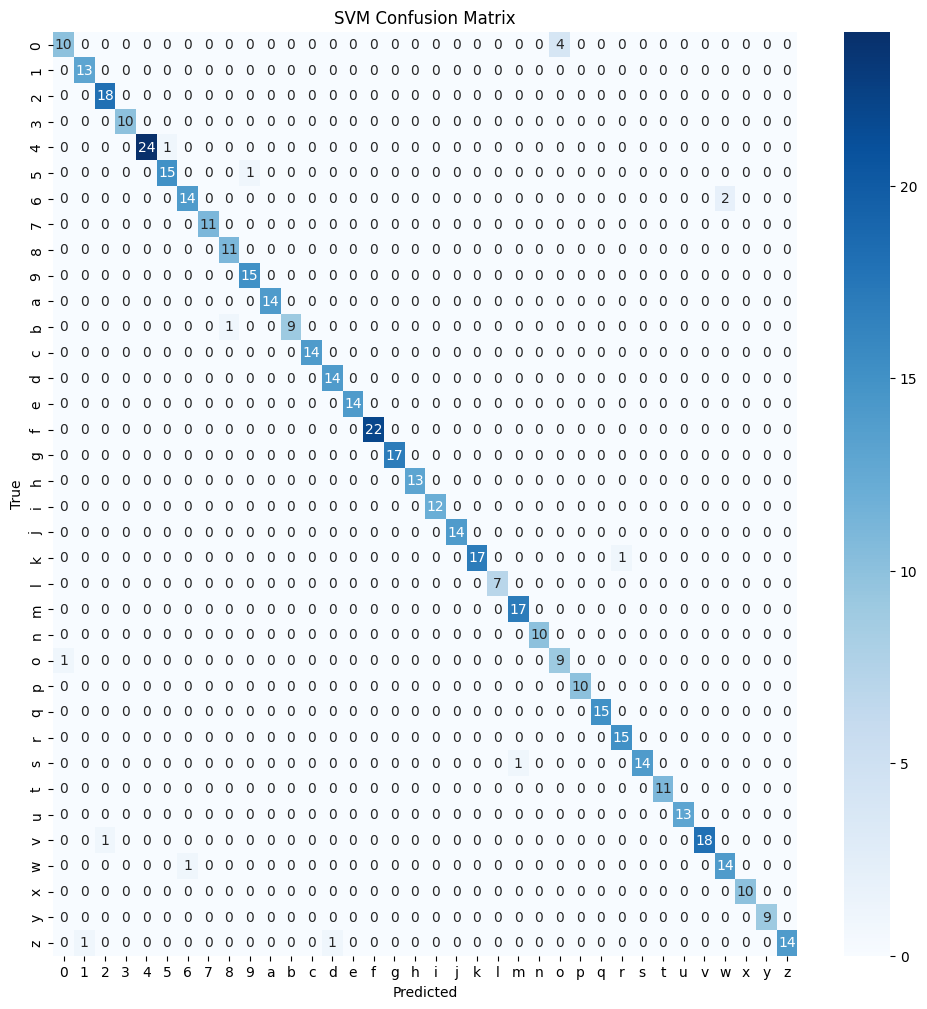

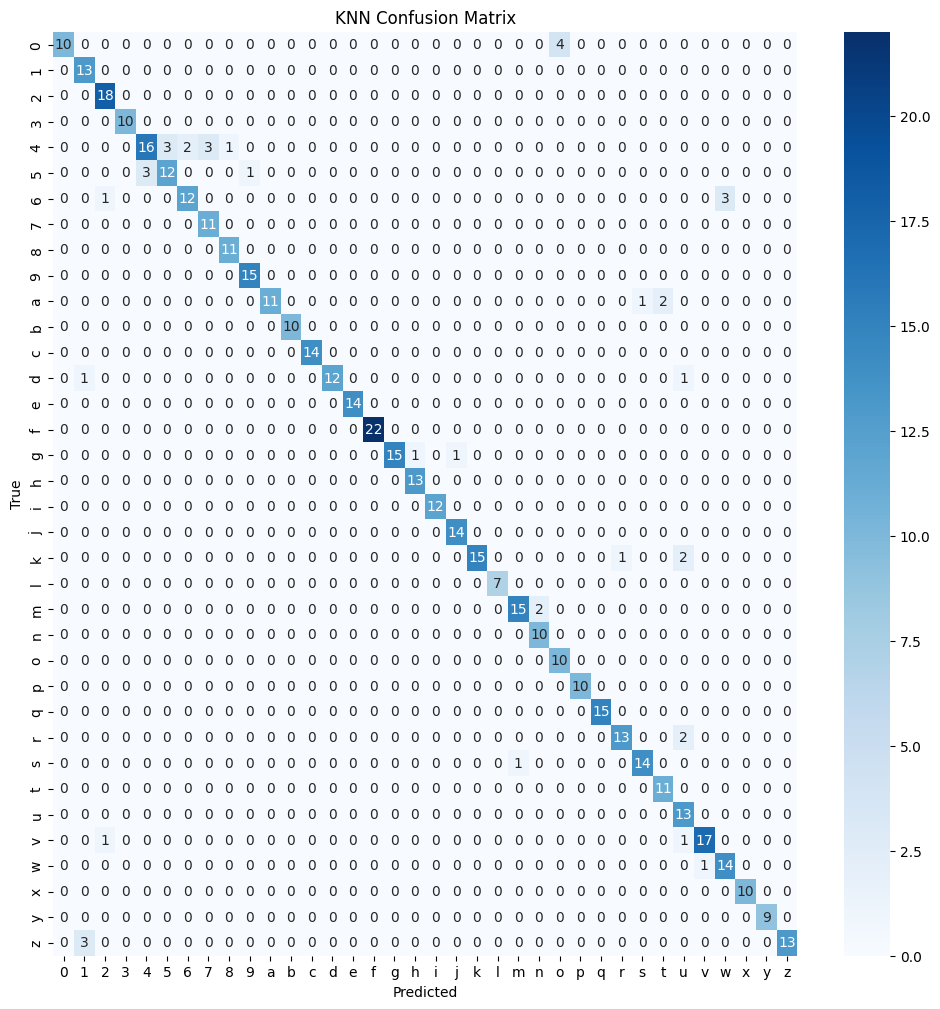

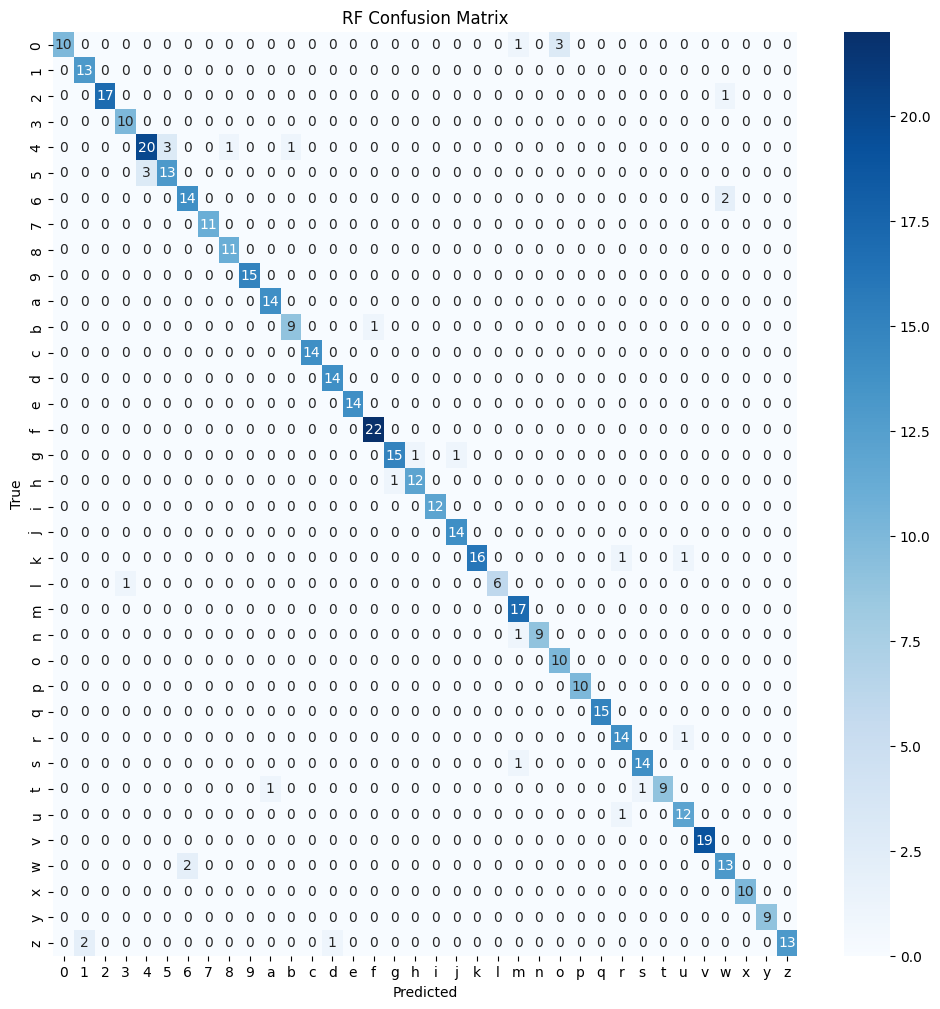

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    conf_mat = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, svm_y_pred, 'SVM Confusion Matrix')

# Plot confusion matrix for KNN
plot_confusion_matrix(y_test, knn_y_pred, 'KNN Confusion Matrix')

# Plot confusion matrix for RF
plot_confusion_matrix(y_test, rf_y_pred, 'RF Confusion Matrix')

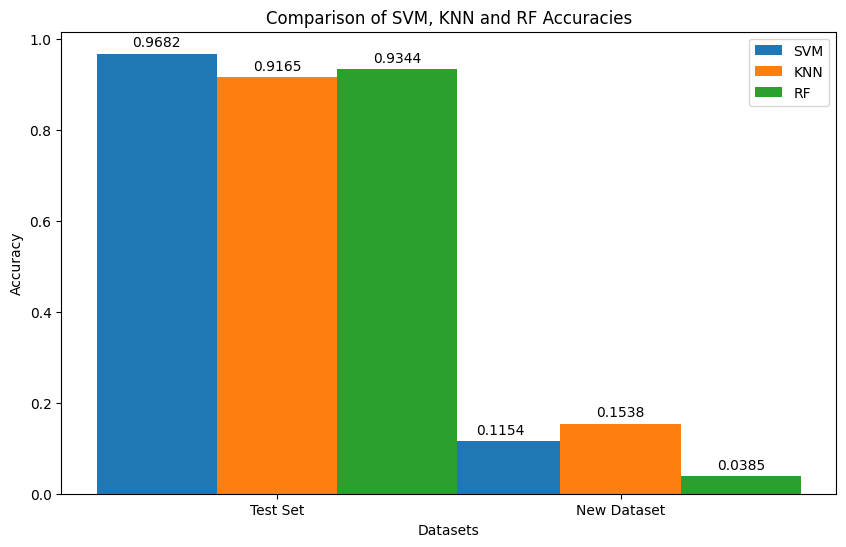

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracies for both models on both datasets
models = ['SVM', 'KNN', 'Random Forest']
datasets = ['Test Set', 'New Dataset']
accuracies = {
    'SVM': [svm_accuracy, new_svm_accuracy],
    'KNN': [knn_accuracy, new_knn_accuracy],
    'RF': [rf_accuracy, new_rf_accuracy]
}

# Creating the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(datasets))

svm_bar = ax.bar(index, accuracies['SVM'], bar_width, label='SVM')
knn_bar = ax.bar(index + bar_width, accuracies['KNN'], bar_width, label='KNN')
rf_bar = ax.bar(index + 2*bar_width, accuracies['RF'], bar_width, label='RF')  # Corrected 'rf' to 'RF' and index + bar_width to index + 2*bar_width


# Adding the labels, title, and legend
ax.set_xlabel('Datasets')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of SVM, KNN and RF Accuracies')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(datasets)
ax.legend()

# Adding the accuracy values on top of the bars
for rect in svm_bar.patches + knn_bar.patches + rf_bar.patches:  # Corrected svm_bar + knn_bar to svm_bar.patches + knn_bar.patches + rf_bar.patches
    height = rect.get_height()
    ax.annotate(f'{height:.4f}', 
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom')

plt.show()